In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [ ]:
import io
flight_train_data = pd.read_excel(io.BytesIO(data_to_load['Data_Train.xlsx']))

In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [ ]:
import io
flight_test_data= pd.read_excel(io.BytesIO(data_to_load['Test_set.xlsx']))

In [ ]:
Test_data = flight_test_data.copy()
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
flight_test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
flight_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
flight_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
def missing_val(x):
    missing_value = {}
    for i in x.columns:
        if x[i].isnull().sum() > 0:
            missing_value[i] = x[i].isnull().sum()
    print(missing_value)

In [ ]:
missing_val(flight_train_data)

{'Route': 1, 'Total_Stops': 1}


In [ ]:
missing_val(flight_test_data)

{}


In [ ]:
flight_train_data.dropna(inplace = True)

In [ ]:
flight_train_data.shape

(10682, 11)

In [ ]:
# check the object type columns values

obj_col = flight_train_data.select_dtypes(include= "object")
def check_value(x):
    for i in x.columns:
        print(x[i].value_counts(),"\n")
  

In [ ]:
check_value(obj_col)

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    15

In [ ]:
#Change the datatypes of Date columns

flight_train_data["Date_of_Journey"] = pd.to_datetime(flight_train_data["Date_of_Journey"])
flight_test_data["Date_of_Journey"] = pd.to_datetime(flight_test_data["Date_of_Journey"])

# Training Data
flight_train_data["Day"]  = flight_train_data["Date_of_Journey"].dt.day
flight_train_data["Month"]  = flight_train_data["Date_of_Journey"].dt.month
flight_train_data["Year"]  = flight_train_data["Date_of_Journey"].dt.year

flight_train_data.drop("Date_of_Journey", axis = 1, inplace = True)
# Test data

flight_test_data["Day"]  = flight_test_data["Date_of_Journey"].dt.day
flight_test_data["Month"]  = flight_test_data["Date_of_Journey"].dt.month
flight_test_data["Year"]  = flight_test_data["Date_of_Journey"].dt.year

flight_test_data.drop("Date_of_Journey", axis = 1, inplace = True)

In [ ]:
# seprating route and saving it in outhes columns

# Training Data 

flight_train_data["First_route"] =  flight_train_data["Route"].str.split("→ ").str[0] 
flight_train_data["Seond_route"] =  flight_train_data["Route"].str.split("→ ").str[1]
flight_train_data["third_route"] =  flight_train_data["Route"].str.split("→ ").str[2]
flight_train_data["forth_route"] =  flight_train_data["Route"].str.split("→ ").str[3]
flight_train_data.drop("Route",axis =1, inplace= True)

# Testing Data

flight_test_data["First_route"] =  flight_test_data["Route"].str.split("→ ").str[0] 
flight_test_data["Seond_route"] =  flight_test_data["Route"].str.split("→ ").str[1]
flight_test_data["third_route"] =  flight_test_data["Route"].str.split("→ ").str[2]
flight_test_data["forth_route"] =  flight_test_data["Route"].str.split("→ ").str[3]
flight_test_data.drop("Route",axis =1, inplace= True)

In [ ]:
# seprating Dept_time into hours and min

# Training data

flight_train_data["Dep_Time_hours"] = flight_train_data["Dep_Time"].str.split(":").str[0]
flight_train_data["Dep_Time_Min"] = flight_train_data["Dep_Time"].str.split(":").str[1]
 
flight_train_data.drop("Dep_Time",axis = 1, inplace = True)    

# Test Data

flight_test_data["Dep_Time_hours"] = flight_test_data["Dep_Time"].str.split(":").str[0]
flight_test_data["Dep_Time_Min"] = flight_test_data["Dep_Time"].str.split(":").str[1]

flight_test_data.drop("Dep_Time",axis = 1, inplace = True)

In [ ]:
# Dividing Arrival time, i wont take date and month from this column into considering because it not available for all the observations

# Training Data
flight_train_data["Arrival_Time"] = flight_train_data["Arrival_Time"].str.split(" ").str[0] # seprate hour and date month
flight_train_data["Arrival_Time_hours"] = flight_train_data["Arrival_Time"].str.split(":").str[0]
flight_train_data["Arrival_Time_min"] = flight_train_data["Arrival_Time"].str.split(":").str[1]
flight_train_data.drop("Arrival_Time",axis = 1, inplace = True)

# Test data

flight_test_data["Arrival_Time"] = flight_test_data["Arrival_Time"].str.split(" ").str[0] # seprate hour and date month
flight_test_data["Arrival_Time_hours"] = flight_test_data["Arrival_Time"].str.split(":").str[0]
flight_test_data["Arrival_Time_min"] = flight_test_data["Arrival_Time"].str.split(":").str[1]
flight_test_data.drop("Arrival_Time",axis = 1, inplace = True)

In [ ]:
duration = list(flight_train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
             duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_mins.append(int(duration[i].split("m")[0].split()[-1]))
    
    
test_duration = list(flight_test_data["Duration"])
for i in range(len(test_duration)):
    if len(test_duration[i].split()) !=2:
        if "h" in test_duration[i]:
             test_duration[i] = test_duration[i].strip() + " 0m" 
        else:
            test_duration[i] = "0h " + test_duration[i]
test_duration_hours = []
test_duration_mins = []

for i in range(len(test_duration)):
    test_duration_hours.append(int(test_duration[i].split("h")[0]))
    test_duration_mins.append(int(test_duration[i].split("m")[0].split()[-1]))

In [ ]:
# Training data
flight_train_data["Duration_hours"] = duration_hours
flight_train_data["Duration_Min"] = duration_mins
flight_train_data.drop("Duration",axis = 1,inplace = True)

# test data
flight_test_data["Duration_hours"] = test_duration_hours
flight_test_data["Duration_Min"] = test_duration_mins
flight_test_data.drop("Duration",axis = 1,inplace = True)

In [ ]:
# extracting the the stop details 
# Training Data
flight_train_data["Total_Stops"].replace("non-stop","0 stop",inplace = True)
flight_train_data["Total_Stops"] =  flight_train_data["Total_Stops"].str.split(" ").str[0] 

# Test data
flight_test_data["Total_Stops"].replace("non-stop","0 stop",inplace = True)
flight_test_data["Total_Stops"] =  flight_test_data["Total_Stops"].str.split(" ").str[0]

In [ ]:
flight_train_data["Price"].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

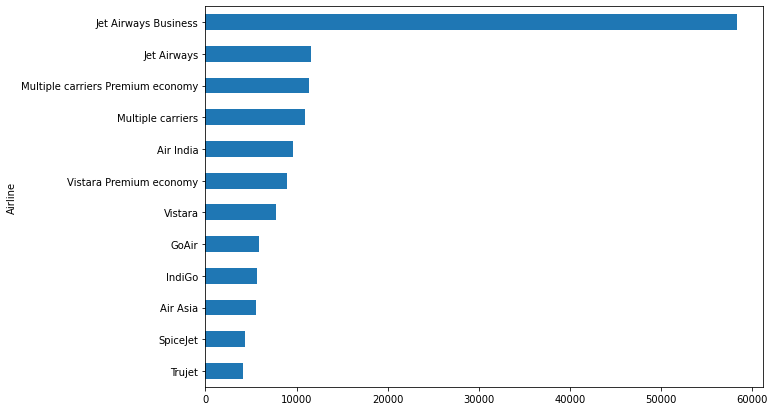

In [ ]:
plt.figure(figsize =(10,7))
flight_train_data.groupby("Airline")["Price"].mean().sort_values(ascending= True).plot(kind = "barh")


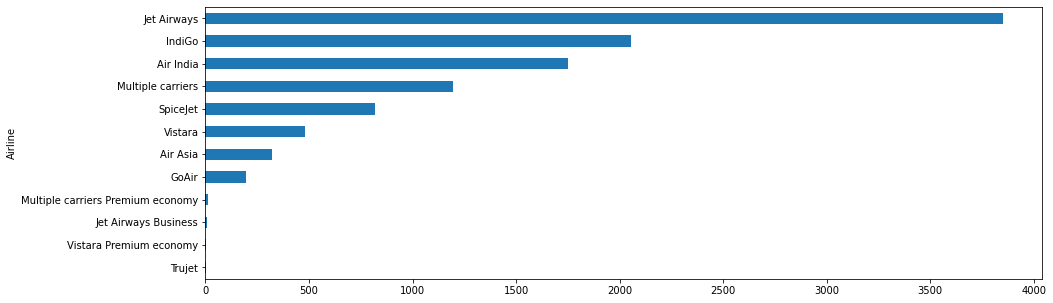

In [ ]:
plt.figure(figsize = (15,5))
flight_train_data.groupby("Airline")["Airline"].count().sort_values(ascending = True).plot(kind = "barh");

In [ ]:
flight_train_data[flight_train_data["Airline"] =="Jet Airways Business"]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,First_route,Seond_route,third_route,forth_route,Dep_Time_hours,Dep_Time_Min,Arrival_Time_hours,Arrival_Time_min,Duration_hours,Duration_Min
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,3,1,2019,BLR,BOM,DEL,NaN,05,45,10,45,5,0
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,3,1,2019,BLR,BOM,DEL,NaN,05,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,3,1,2019,BLR,BOM,DEL,NaN,05,45,12,25,6,40
7351,Jet Airways Business,Delhi,Cochin,2,No info,46490,3,3,2019,DEL,ATQ,BOM,COK,20,05,04,25,8,20
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,3,6,2019,DEL,ATQ,BOM,COK,20,05,04,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,3,1,2019,BLR,MAA,DEL,NaN,09,45,14,25,4,40


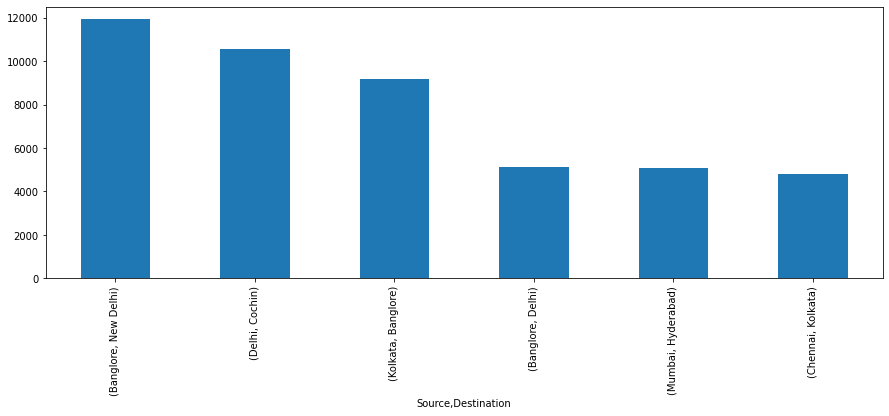

In [ ]:
plt.figure(figsize =(15,5))
flight_train_data.groupby(["Source","Destination"])["Price"].mean().sort_values(ascending= False).plot(kind = "bar")

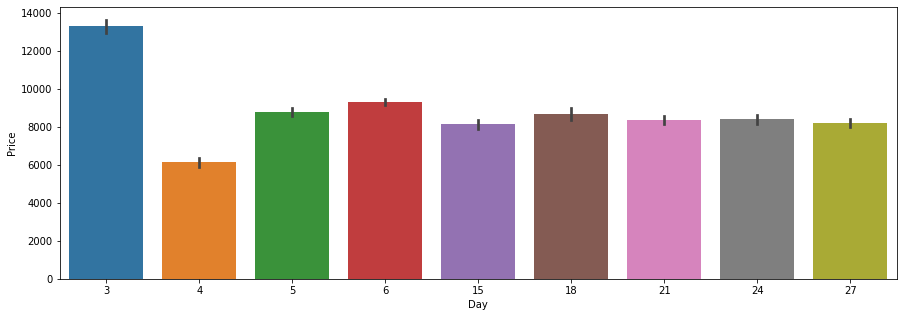

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = "Day", y = "Price", data = flight_train_data)

In [ ]:
pd.pivot_table(flight_train_data, values = "Price",index ="Source", aggfunc="mean", columns = "Month" )

Month,1,3,4,5,6,9,12
Source,,,,,,,
Banglore,14225.078292,7809.777236,5148.201923,4803.541667,7840.174118,6593.072072,8304.269565
Chennai,5585.184211,4704.951456,NaN,4384.078125,4699.682243,4883.333333,5140.166667
Delhi,10709.438356,10176.883625,6126.155963,10702.897679,10750.217018,11190.991241,10200.360000
Kolkata,9092.089286,8344.732733,4479.514019,10177.647453,8582.591356,9575.911548,9583.748011
Mumbai,5261.833333,3698.661376,NaN,3578.570000,6512.507042,4000.679245,7023.728571


In [ ]:
pd.pivot_table(flight_train_data, values = "Price",index =["Source","Destination"], aggfunc="mean", columns = "Day" )

Day                             3            4             5             6   \
Source   Destination                                                          
Banglore Delhi                 NaN  5091.176744   4995.629808   5438.763889   
         New Delhi    14493.081181          NaN           NaN           NaN   
Chennai  Kolkata       7252.538462          NaN   4372.522388   4450.476923   
Delhi    Cochin       14216.060391  6550.446970  11173.741379  10481.231412   
Kolkata  Banglore      5208.716216  7119.089219  10036.759669   9819.789474   
Mumbai   Hyderabad    11322.500000  3450.307692   3663.098039   3662.020202   

Day                            15            18           21            24  \
Source   Destination                                                         
Banglore Delhi        5094.047619   5262.204918  5255.786885   4986.380165   
         New Delhi    8644.922330  12121.294737  6922.709677   5720.202020   
Chennai  Kolkata      5009.358974   4340.307692  3963.027027   4571.736842   
Delhi    Cochin       9569.119332  10719.696296  9842.086081   9750.591640   
Kolkata  Banglore     8659.063025   8967.514894  9015.367347  10107.777512   
Mumbai   Hyderabad    3386.542373   3525.084507  3891.352941   3620.846154   

Day                            27  
Source   Destination               
Banglore Delhi        4964.392593  
         New Delhi            NaN  
Chennai  Kolkata      4104.136364  
Delhi    Cochin       9709.459158  
Kolkata  Banglore     4313.253165  
Mumbai   Hyderabad    3654.687500

In [ ]:
pd.pivot_table(flight_train_data, values = "Duration_hours", index = "Airline", columns = "Day", aggfunc = "count")

Day,3,4,5,6,15,18,21,24,27
Airline,,,,,,,,,
Air Asia,28.0,26.0,43.0,60.0,33.0,28.0,31.0,37.0,33.0
Air India,302.0,103.0,235.0,324.0,167.0,134.0,178.0,166.0,142.0
GoAir,21.0,22.0,22.0,34.0,23.0,12.0,12.0,28.0,20.0
IndiGo,289.0,160.0,233.0,346.0,218.0,159.0,206.0,204.0,238.0
Jet Airways,416.0,207.0,600.0,885.0,285.0,320.0,405.0,376.0,355.0
Jet Airways Business,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Multiple carriers,173.0,14.0,71.0,307.0,132.0,63.0,138.0,73.0,225.0
Multiple carriers Premium economy,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
SpiceJet,63.0,80.0,108.0,125.0,87.0,79.0,89.0,100.0,87.0


In [ ]:
flight_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10682 non-null  object
 1   Source              10682 non-null  object
 2   Destination         10682 non-null  object
 3   Total_Stops         10682 non-null  object
 4   Additional_Info     10682 non-null  object
 5   Price               10682 non-null  int64 
 6   Day                 10682 non-null  int64 
 7   Month               10682 non-null  int64 
 8   Year                10682 non-null  int64 
 9   First_route         10682 non-null  object
 10  Seond_route         10682 non-null  object
 11  third_route         7191 non-null   object
 12  forth_route         1566 non-null   object
 13  Dep_Time_hours      10682 non-null  object
 14  Dep_Time_Min        10682 non-null  object
 15  Arrival_Time_hours  10682 non-null  object
 16  Arrival_Time_min    10

In [ ]:
flight_train_data.drop(columns = ["First_route","Seond_route","third_route","forth_route"],axis =1, inplace = True)
flight_test_data.drop(columns = ["First_route","Seond_route","third_route","forth_route"],axis =1, inplace = True)

# Deleting addition information column as well as it is no relevant 

# Training data

flight_train_data.drop("Additional_Info",axis = 1, inplace = True)

# test Data

flight_test_data.drop("Additional_Info",axis = 1, inplace = True)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# training data

flight_train_data["Airline"] = le.fit_transform(flight_train_data["Airline"])
flight_train_data["Source"] = le.fit_transform(flight_train_data["Source"])
flight_train_data["Destination"] = le.fit_transform(flight_train_data["Destination"])

# Test Data

flight_test_data["Airline"] = le.fit_transform(flight_test_data["Airline"])
flight_test_data["Source"] = le.fit_transform(flight_test_data["Source"])
flight_test_data["Destination"] = le.fit_transform(flight_test_data["Destination"])

In [ ]:
flight_train_data.drop(columns = ["Day","Month","Year"],axis = 1, inplace = True)
flight_test_data.drop(columns = ["Day","Month","Year"],axis = 1, inplace = True)

In [ ]:
flight_train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_Min,Arrival_Time_hours,Arrival_Time_min,Duration_hours,Duration_Min
0,3,0,5,0,3897,22,20,01,10,2,50
1,1,3,0,2,7662,05,50,13,15,7,25
2,4,2,1,2,13882,09,25,04,25,19,0
3,3,3,0,1,6218,18,05,23,30,5,25
4,3,0,5,1,13302,16,50,21,35,4,45


In [ ]:
flight_test_data.head()

,Airline,Source,Destination,Total_Stops,Dep_Time_hours,Dep_Time_Min,Arrival_Time_hours,Arrival_Time_min,Duration_hours,Duration_Min
0,4,2,1,1,17,30,04,25,10,55
1,3,3,0,1,06,20,10,20,4,0
2,4,2,1,1,19,15,19,00,23,45
3,6,2,1,1,08,00,21,00,13,0
4,0,0,2,0,23,55,02,45,2,50


In [ ]:
flight_train_data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Airline           5.532328e+00
Source            1.385980e+00
Destination       2.175167e+00
Price             2.126638e+07
Duration_hours    7.216359e+01
Duration_Min      2.871607e+02
dtype: float64

In [ ]:
flight_test_data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Airline             5.270039
Source              1.402632
Destination         2.154939
Duration_hours     70.403566
Duration_Min      280.483799
dtype: float64

In [ ]:
flight_train_data.dtypes

Airline                int64
Source                 int64
Destination            int64
Total_Stops           object
Price                  int64
Dep_Time_hours        object
Dep_Time_Min          object
Arrival_Time_hours    object
Arrival_Time_min      object
Duration_hours         int64
Duration_Min           int64
dtype: object

In [ ]:
# Changing the data type
# training data
flight_train_data["Total_Stops"] = flight_train_data["Total_Stops"].astype(int) 
flight_train_data["Dep_Time_hours"] = flight_train_data["Dep_Time_hours"].astype(int) 
flight_train_data["Dep_Time_Min"] = flight_train_data["Dep_Time_Min"].astype(int) 
flight_train_data["Arrival_Time_hours"] = flight_train_data["Arrival_Time_hours"].astype(int) 
flight_train_data["Arrival_Time_min"] = flight_train_data["Arrival_Time_min"].astype(int) 

# Test Data
flight_test_data["Total_Stops"] = flight_test_data["Total_Stops"].astype(int) 
flight_test_data["Dep_Time_hours"] = flight_test_data["Dep_Time_hours"].astype(int) 
flight_test_data["Dep_Time_Min"] = flight_test_data["Dep_Time_Min"].astype(int) 
flight_test_data["Arrival_Time_hours"] = flight_test_data["Arrival_Time_hours"].astype(int) 
flight_test_data["Arrival_Time_min"] = flight_test_data["Arrival_Time_min"].astype(int) 

In [ ]:
flight_train_data.dtypes

Airline               int64
Source                int64
Destination           int64
Total_Stops           int64
Price                 int64
Dep_Time_hours        int64
Dep_Time_Min          int64
Arrival_Time_hours    int64
Arrival_Time_min      int64
Duration_hours        int64
Duration_Min          int64
dtype: object

In [ ]:
flight_test_data.dtypes

Airline               int64
Source                int64
Destination           int64
Total_Stops           int64
Dep_Time_hours        int64
Dep_Time_Min          int64
Arrival_Time_hours    int64
Arrival_Time_min      int64
Duration_hours        int64
Duration_Min          int64
dtype: object

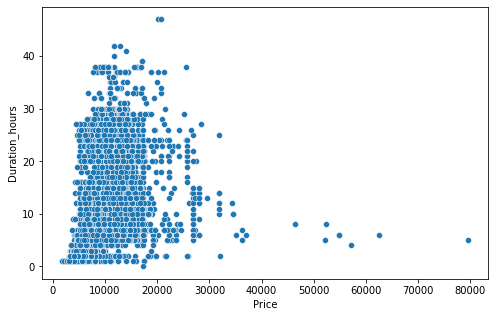

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x ="Price", y = "Duration_hours" , data = flight_train_data)

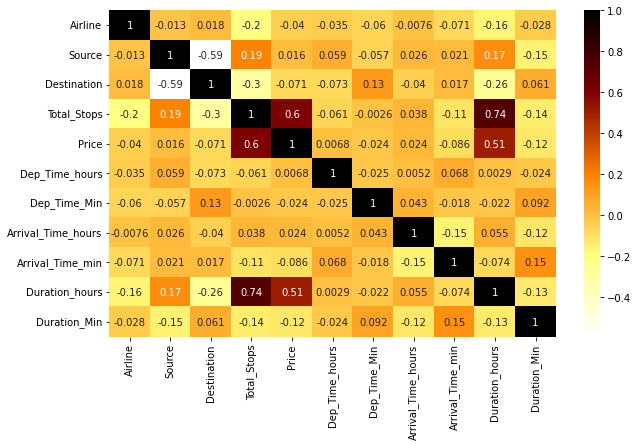

In [ ]:
plt.figure(figsize =(10,6))
sns.heatmap(flight_train_data.corr(),annot= True, cmap = "afmhot_r")

In [ ]:
# Seprating X & Y
X = flight_train_data.drop("Price",axis =1)
y = flight_train_data["Price"]

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

In [ ]:
select_best = SelectKBest(score_func = f_regression, k = 5)
select_best.fit(X,y)

SelectKBest(k=5, score_func=<function f_regression at 0x7f8ff4ea0dd0>)

In [ ]:
feature_score = pd.DataFrame(select_best.scores_)
feature_Pvalue = pd.DataFrame(np.round(select_best.pvalues_,4))
feature_name = pd.DataFrame(flight_train_data.drop("Price",axis = 1).columns)

important_feature = pd.concat([feature_name,feature_score,feature_Pvalue], axis =1)
important_feature.columns = ["Feature_name","Feature_score","Pvalue"]
print(important_feature.nlargest(12,columns ="Feature_score"))

         Feature_name  Feature_score  Pvalue
3         Total_Stops    6130.729912  0.0000
8      Duration_hours    3730.131941  0.0000
9        Duration_Min     169.124159  0.0000
7    Arrival_Time_min      79.867692  0.0000
2         Destination      54.298423  0.0000
0             Airline      16.744381  0.0000
5        Dep_Time_Min       6.392435  0.0115
6  Arrival_Time_hours       6.280954  0.0122
1              Source       2.734523  0.0982
4      Dep_Time_hours       0.493755  0.4823


In [ ]:
select_X = flight_train_data[["Total_Stops","Duration_hours","Duration_Min","Arrival_Time_min","Destination"]]

In [ ]:
select_y = flight_train_data["Price"] 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(select_X,select_y, test_size = 0.25, random_state =100)
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
pred = RF.predict(X_test)
print("r2_score", r2_score(y_test, pred))
print("mean_squred_error", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)),"\n")

r2_score 0.5585433151035628
mean_squred_error 9566471.36892208
RMSE 3092.9712848524928 



**Model**

In [ ]:
# Performing Standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)
flight_test = sc.fit_transform(flight_test_data)

In [ ]:
for i in range(40,300,60):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state =i)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    pred = LR.predict(X_test)
    print("r2_score", r2_score(y_test, pred),"Random_state",i)
    print("mean_squred_error", mean_squared_error(y_test, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test, pred)),"\n")

r2_score 0.3793749774086722 Random_state 40
mean_squred_error 14156082.034028748
RMSE 3762.4569145744044 

r2_score 0.3945914623210325 Random_state 100
mean_squred_error 13119347.017172262
RMSE 3622.063916770694 

r2_score 0.36470537335325237 Random_state 160
mean_squred_error 14117778.438372064
RMSE 3757.3632294964596 

r2_score 0.3742753981697722 Random_state 220
mean_squred_error 15239453.803027794
RMSE 3903.774302265411 

r2_score 0.4102215751933107 Random_state 280
mean_squred_error 12139102.137359457
RMSE 3484.121429766686 



In [ ]:
model = [RandomForestRegressor(n_estimators=100),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(n_estimators=100),AdaBoostRegressor()]

for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state =280)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print("r2_score", r2_score(y_test1, pred),i)
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

r2_score 0.6246910018338763 RandomForestRegressor()
mean_squred_error 7724789.633160817
RMSE 2779.3505775919703 

r2_score 0.5559099907875408 DecisionTreeRegressor()
mean_squred_error 9140473.359597541
RMSE 3023.321577271849 

r2_score 0.5657531160481153 KNeighborsRegressor()
mean_squred_error 8937877.439056534
RMSE 2989.6283111879534 

r2_score 0.6410197788508389 GradientBoostingRegressor()
mean_squred_error 7388702.92050759
RMSE 2718.2168641422986 

r2_score 0.5135004388518566 AdaBoostRegressor()
mean_squred_error 10013367.078481307
RMSE 3164.3904750332736 



***Hyper Parameter Tuning***

In [ ]:
Gradient_Boost = GradientBoostingRegressor()
Para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

Rand_search = RandomizedSearchCV(Gradient_Boost,Para,cv = 5,scoring = "r2",n_jobs =-1,verbose = 2) 
Rand_search.fit(X_train1,y_train1)
print(Rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
best_Gradient_Boost = GradientBoostingRegressor(n_estimators= 200, max_depth = 3, learning_rate = 0.1)

for i in range(2,11):
    cross_score = cross_val_score(best_Gradient_Boost,X,y,cv = i,n_jobs = -1) 
    print(i,"mean",cross_score.mean() ,"and STD" , cross_score.std())

2 mean 0.6497791657342409 and STD 0.002245219369291007
3 mean 0.65253260425346 and STD 0.005086273621734695
4 mean 0.6592190929160906 and STD 0.02136234811521642
5 mean 0.6597860444401011 and STD 0.01767189082887327
6 mean 0.6588640487794013 and STD 0.014230966676987533
7 mean 0.6601194160371405 and STD 0.019007421722970926
8 mean 0.6587397137078506 and STD 0.02816153237303516
9 mean 0.6576838057610804 and STD 0.02328459382751566
10 mean 0.6591528249344909 and STD 0.0242848877544949


In [ ]:
import pickle
best_Gradient_Boost.fit(X,y)
pred = best_Gradient_Boost.predict(flight_test)

# Saving model

filename = "Flight_price_prediction.pkl"

with open(filename,"wb") as f:
    pickle.dump(best_Gradient_Boost,f)
    

   
# final_submission
pred = pd.Series(pred)

Test_data["Prediction"] = pred
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Prediction
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,11950.429504
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5027.122197
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,12032.934320
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,10810.994127
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4365.687089
